## 数据预处理

In [1]:
import urllib.request
import os
import tarfile
import pandas as pd
import numpy
from sklearn import preprocessing
from pandas import DataFrame as df

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

### 把需要的字段选取到 DataFrame 中。

In [3]:
cols = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df = all_df[cols]

### 依照 8:2 的比例将数据分为训练数据与测试数据。

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

### 显示训练数据与测试数据进行预处理

In [5]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1052 test: 257


### 将训练数据与测试数据进行预处理

name：姓名字段在预测阶段会使用，但是训练时不需要，必须先删除。  
age：有几项数据的 age 字段是 null 值，所遇必须将 null 值改为平均值。  
fare：有几项数据的 fare 字段是 null 值，所以必须将 null 值改为平均值。  
sex：性别字段是文字，我们必须转换为 0 与 1。  
embarked：分类特征字段有 3 个分类C、Q、S，必须使用 One-Hot Encoding进行转换。

In [6]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'],axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

train_Features（训练数据的特征字段）, train_Label（训练数据的标签字段）  
test_Features（测试数据的特征字段）, test_Label（测试数据的标签字段）

In [7]:
train_Features,train_Label = PreprocessData(train_df)
test_Features,test_Label = PreprocessData(test_df)

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()

Using TensorFlow backend.


In [9]:
model.add(Dense(units=40,input_dim=9,
                kernel_initializer='uniform',
                activation='relu'))

In [10]:
model.add(Dense(units=30,
                kernel_initializer='uniform',
                activation='relu'))

In [11]:
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

# 开始训练

使用compile方法对训练模型进行设置

In [12]:
# try:
#     model.load_weights("SaveModel/titanicMlpModel.h30")
#     print("加载模型成功！继续训练模型")
# except:
#     print("加载模型失败！开始训练一个新模型")

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])

开始训练

In [14]:
 train_history = model.fit(x=train_Features,
                           y=train_Label,
                           validation_split=0.1,
                           epochs=30,
                           batch_size=30,
                           verbose=2)

Train on 946 samples, validate on 106 samples
Epoch 1/30
 - 0s - loss: 0.6885 - acc: 0.6015 - val_loss: 0.6626 - val_acc: 0.8302
Epoch 2/30
 - 0s - loss: 0.6600 - acc: 0.6226 - val_loss: 0.5628 - val_acc: 0.8302
Epoch 3/30
 - 0s - loss: 0.5993 - acc: 0.6744 - val_loss: 0.4655 - val_acc: 0.8396
Epoch 4/30
 - 0s - loss: 0.5398 - acc: 0.7431 - val_loss: 0.4243 - val_acc: 0.8302
Epoch 5/30
 - 0s - loss: 0.4934 - acc: 0.7770 - val_loss: 0.4013 - val_acc: 0.8019
Epoch 6/30
 - 0s - loss: 0.4770 - acc: 0.7600 - val_loss: 0.3975 - val_acc: 0.8302
Epoch 7/30
 - 0s - loss: 0.4710 - acc: 0.7685 - val_loss: 0.3862 - val_acc: 0.8113
Epoch 8/30
 - 0s - loss: 0.4660 - acc: 0.7706 - val_loss: 0.3955 - val_acc: 0.8208
Epoch 9/30
 - 0s - loss: 0.4642 - acc: 0.7844 - val_loss: 0.3933 - val_acc: 0.8208
Epoch 10/30
 - 0s - loss: 0.4621 - acc: 0.7738 - val_loss: 0.3796 - val_acc: 0.8302
Epoch 11/30
 - 0s - loss: 0.4606 - acc: 0.7727 - val_loss: 0.3752 - val_acc: 0.8302
Epoch 12/30
 - 0s - loss: 0.4581 - acc:

In [15]:
# model.save_weights("SaveModel/titanicMlpModel.h30")
# print("Saved model to disk")

## 画出准确率的执行结果

In [16]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation,loc_num=0):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc=loc_num) # 为了适应不同的图例的位置，不妨碍图里的数据，调用的时候需传入loc_num参数


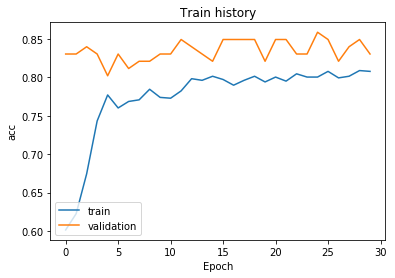

In [17]:
show_train_history(train_history,'acc','val_acc',3)

# 画出误差的执行结果

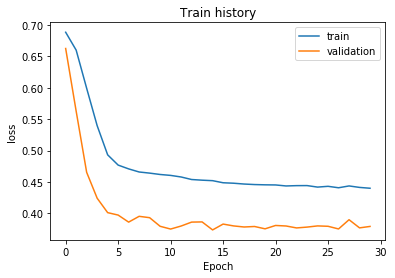

In [18]:
show_train_history(train_history,'loss','val_loss')

# 评估模型准确率

In [19]:
scores = model.evaluate(x=test_Features,
                        y=test_Label)

257/257 [==============================] - 0s 29us/step


In [20]:
scores[1]

0.7354085603112841

在电影中，Jack与Rose是虚构人物，我们希望能用所训练完成的模型预测男女主角的生存概率。

使用pd.Series建立 Jack 与 Rose 的数据：

In [21]:
Jack = pd.Series([0,'Jack',3,'male',23,1,0,5.0000,'S'])
Rose = pd.Series([1,'Rose',1,'female',20,1,0,100.0000,'S'])

创建 Jack 与 Rose 的 DataFrame。

In [22]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],
                     columns=['survived','name','pclass','sex',
                             'age','sibsp','parch','fare','embarked'])

将 JR_df 加入 all_df。

In [23]:
all_df = pd.concat([all_df,JR_df])

查看 all_df 最后两项数据。

In [24]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 进行预测

执行数据预处理。

In [25]:
all_Features,Label = PreprocessData(all_df)

执行预测。

In [26]:
all_probability = model.predict(all_Features)

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
all_probability[:10]

array([[ 0.9700228 ],
       [ 0.49318969],
       [ 0.97212327],
       [ 0.30187199],
       [ 0.96657181],
       [ 0.20441543],
       [ 0.9231022 ],
       [ 0.24561782],
       [ 0.92159516],
       [ 0.27756089]], dtype=float32)

将 all_df 与 all_probability 整合。

In [29]:
pddf = all_df
pddf.insert(len(all_df.columns),
            'probability',all_probability)

In [30]:
pddf[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.117590
1,1,Rose,1,female,20.0,1,0,100.0,S,0.964611


## 查看生存概率搞，却没有存活的旅客

In [31]:
pddf[(pddf['survived']==0) & (pddf['probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972123
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.966572
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.975502
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.971317
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.932943
